# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [6]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers.pkl")
print(df.shape)
df.head()

(4168, 26)


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male
0,0,0.137225,0.113943,0.166169,51,0.150770,0.151492,6,2,0.167044,1,0.145889,0.127476,131160,1.0,11,0,1.0,0.063158,1,0,0,0.153057,3,1.0,0.0
1,1,0.137225,0.164034,0.177778,31,0.245983,0.157820,10,1,0.167044,1,0.183935,0.253256,41890,0.0,23,1,6.0,0.175817,5,1,4,0.161232,4,1.0,0.0
2,0,0.150179,0.164034,0.309322,32,0.245983,0.157820,17,4,0.126582,4,0.169456,0.127476,193280,1.0,15,3,5.0,0.171053,5,0,3,0.153057,3,0.0,1.0
3,0,0.134909,0.113943,0.143733,38,0.081818,0.157820,2,5,0.167044,3,0.136364,0.127476,83210,3.0,11,3,13.0,0.147399,8,7,5,0.161232,3,0.0,1.0
4,0,0.134909,0.229044,0.143733,32,0.150770,0.157820,10,1,0.160557,1,0.169456,0.253256,23420,4.0,12,2,9.0,0.171053,6,0,4,0.153057,3,0.0,1.0


In [9]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

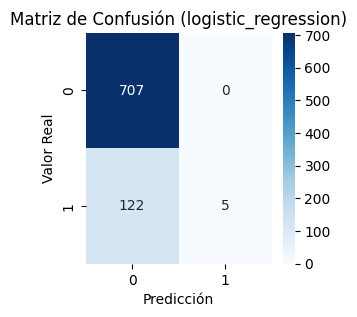

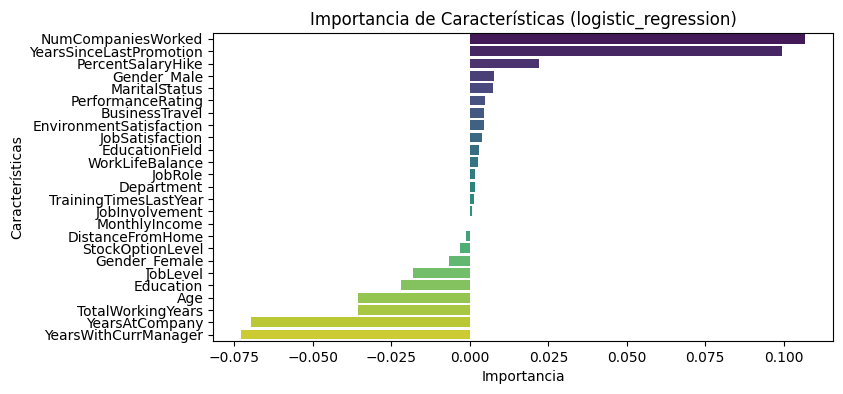

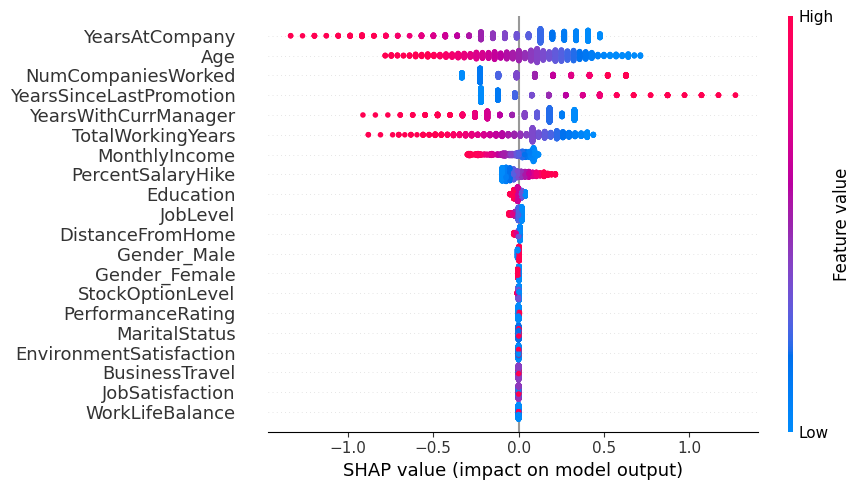

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [10]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=10)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.957409,0.958545,0.957409,0.955065,0.828608,0.972143,0.001,16.0,NaN,NaN
test,0.942446,0.943694,0.942446,0.937575,0.742092,0.928182,NaN,NaN,0.001,16.0


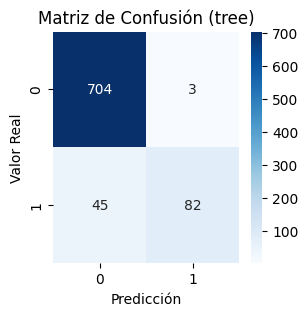

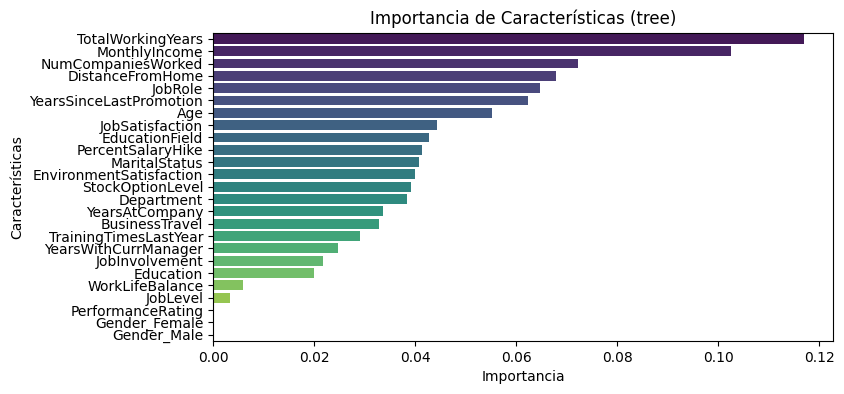

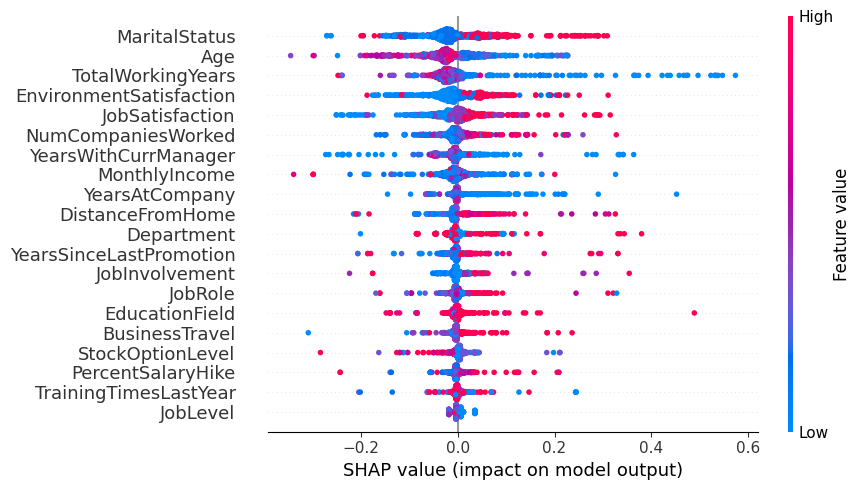

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.957409,0.958545,0.957409,0.955065,0.828608,0.972143,0.001000,16.0,NaN,NaN,decision tree
test,0.942446,0.943694,0.942446,0.937575,0.742092,0.928182,NaN,NaN,0.001000,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [12]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=16, n_estimators=200, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.999700,0.999700,0.999700,0.999700,0.998906,1.000000,0.081264,-1.0,NaN,NaN
test,0.994005,0.994047,0.994005,0.993955,0.976398,0.999499,NaN,NaN,0.081264,-1.0


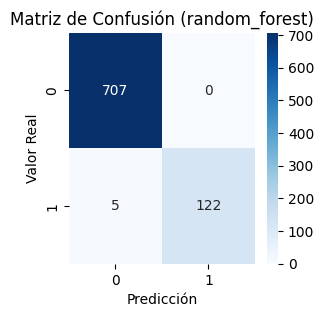

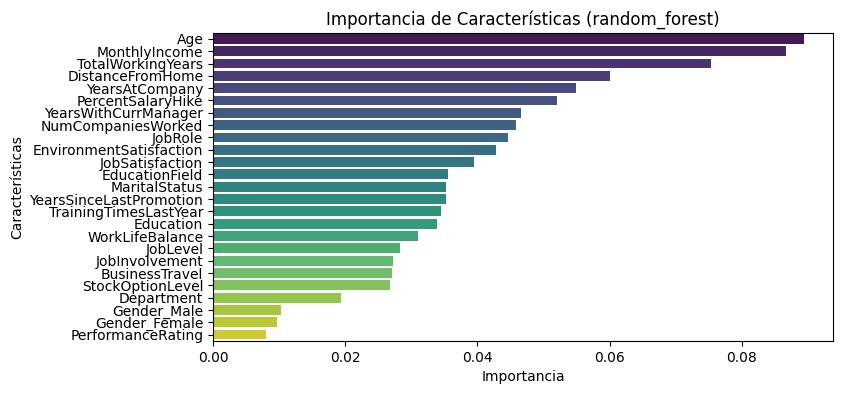

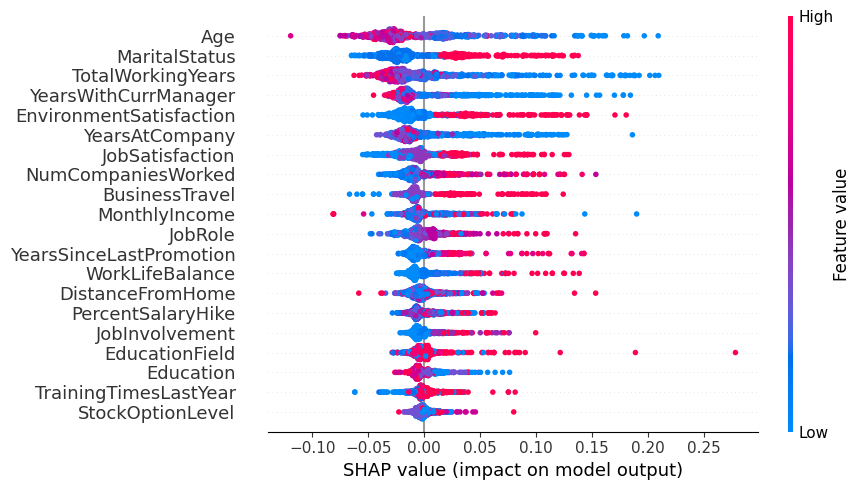

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999700,0.999700,0.999700,0.999700,0.998906,1.000000,0.081264,-1.0,NaN,NaN,random forest
test,0.994005,0.994047,0.994005,0.993955,0.976398,0.999499,NaN,NaN,0.081264,-1.0,random forest
train,0.957409,0.958545,0.957409,0.955065,0.828608,0.972143,0.001000,16.0,NaN,NaN,decision tree
test,0.942446,0.943694,0.942446,0.937575,0.742092,0.928182,NaN,NaN,0.001000,16.0,decision tree
train,0.837133,0.863690,0.837133,0.764110,0.012166,0.701988,0.003007,NaN,NaN,NaN,regresion logistica
test,0.853717,0.875245,0.853717,0.791926,0.064971,0.727806,NaN,NaN,0.003007,NaN,regresion logistica


In [13]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

In [18]:
122/(122+5)


0.9606299212598425

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,4168.0,0.161708,0.368227,0.000000,0.000000,0.000000,0.000000,1.000000
EnvironmentSatisfaction,4168.0,0.161511,0.045522,0.134909,0.134909,0.137225,0.150179,0.254217
JobSatisfaction,4168.0,0.161397,0.040113,0.113943,0.113943,0.164034,0.165123,0.229044
WorkLifeBalance,4168.0,0.161505,0.037623,0.143733,0.143733,0.143733,0.166169,0.309322
Age,4168.0,36.512236,8.908507,18.000000,30.000000,35.000000,42.000000,60.000000
BusinessTravel,4168.0,0.161618,0.045675,0.081818,0.150770,0.150770,0.150770,0.245983
Department,4168.0,0.161817,0.027925,0.151492,0.151492,0.157820,0.157820,0.290323
DistanceFromHome,4168.0,9.101008,8.028723,1.000000,2.000000,7.000000,13.000000,29.000000
Education,4168.0,2.911948,1.022742,1.000000,2.000000,3.000000,4.000000,5.000000
EducationField,4168.0,0.161795,0.036643,0.117188,0.157783,0.160557,0.167044,0.399411
